### Project Introduction

Our project focuses around how different music affects the mood of different listeners. The data set that we have chosen tracks the mood of listeners for various different songs. It also keeps track of other details and features of the songs, such as length, tempo, key, time signature, and popularity. Our group aims to find which of these key characteristics can best determine whether or not a listener will experience a positive or negative mood in response. With the data we can also see temporal trends, and perhaps see if there are any time periods that caused a change in trend for music mood and how they correlate to the events going on in the world.

Link to github repo for the progress report: https://github.com/uic-ds-fall-2023/class-project-next-level-analytics/blob/main/prog-report.ipynb

The dataset has the following columns:
- name
- album
- artist
- id
- release date
- popularity
- length
- danceability
- acousticness
- energy
- instrumentalness
- liveness
- valence
- loudness
- speechiness
- tempo
- key
- time signature
- mood

Any changes: After speaking with the professor, we decided to use a publicly available dataset that has much more data points that we are able to study. The link to the dataset can be found here: https://www.kaggle.com/datasets/musicblogger/spotify-music-data-to-identify-the-moods/data

Due to the change in the dataset that we are using, we have slightly altered the domain questions/hypotheses and scope of our initial project idea that we were aiming to explore and answer. We are now more focused on how key features of the songs that we are listening can impact the mood, such as key and time signature, rather than something as broad as using a song's genre, time spent listening to music, and age range to dictate these outcomes.

### Data Cleaning

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, metrics

In [4]:
# read in the data file
music_data = pd.read_csv('data_moods.csv')

# clean data to include specific columns, exclude subjective columns such as "danceability"
music_data = music_data[['name', 'album', 'artist', 'id', 'release_date', 'popularity', 'tempo', 'key', 'time_signature', 'mood']]

# now remove any rows with n/a values
music_data = music_data.dropna()

# display the first five entries
music_data.head()

,name,album,artist,id,release_date,popularity,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,118.523,5,4,Happy
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,169.881,1,4,Energetic


### Exploratory Data Analysis

Some interesting issues or thoughts on the data is how the data considers various features to affect the moods that people feel about different music. These include aspects such as tempo, time signature of the musical piece, the key the musical piece is played at, the overall popularity number associated the particular musical piece, and the date when the musical piece was released. Based on looking at the data after cleaning it, it appears that key and tempo change across different musical pieces while time signuature appears to be commonly 4 beats per measure but this value is not consistently 4 beats per measure for all songs recorded. There also seem to be different moods present but the Happy and Sad moods seem to be the most useful as they are opposites and can provide greater insights into individual's personal feelings for a song.

Based on the data explored and learned about from the below code, it can be possible to make some preliminary conclusions. It appears that songs that invoke feelings of happiness are often caused to make people feel good about themselves and to emphasize such feelings of joy are generally played at faster tempos. This is indicated below with the average tempo of happy songs are more quicker compared to sad songs. In general, people tend to want to feel happy so happy or feel-good songs tend to be more popular across individuals compared to sad songs. This is also indicated below with the average popularity of happy songs being greater than sad songs.

In [5]:
print("Descriptive Statistics of the Music Data: ")
print(music_data.describe())
print()
print("The average tempo across all songs: ")
print(music_data['tempo'].mean())
print()
print("Average tempo of happy songs:")
happy_songs = music_data[music_data['mood'] == 'Happy']
print(happy_songs['tempo'].mean())
print()
print("Average popularity of happy songs: ")
print(happy_songs['popularity'].mean())
print()
print("Average tempo of sad songs:")
sad_songs = music_data[music_data['mood'] == 'Sad']
print(sad_songs['tempo'].mean())
print()
print("Average popularity of sad songs: ")
print(sad_songs['popularity'].mean())
print()
print("Grouping of years and count of the moods present for that year: ")
data = pd.to_datetime(music_data['release_date'], errors='coerce', utc=True).dt.strftime('%Y')
music_data['year'] = data
music_data.groupby(['year', 'mood'])['mood'].count()

Descriptive Statistics of the Music Data: 
       popularity       tempo         key  time_signature
count  686.000000  686.000000  686.000000      686.000000
mean    41.534985  119.134679    5.335277        3.870262
std     23.045707   28.978685    3.550858        0.500297
min      0.000000   50.960000    0.000000        1.000000
25%     30.000000   99.008750    2.000000        4.000000
50%     47.000000  120.071000    6.000000        4.000000
75%     57.000000  132.953250    9.000000        4.000000
max     88.000000  217.950000   11.000000        5.000000

The average tempo across all songs: 
119.13467930029152

Average tempo of happy songs:
124.21367857142857

Average popularity of happy songs: 
48.58571428571429

Average tempo of sad songs:
115.5997461928934

Average popularity of sad songs: 
37.73096446700507

Grouping of years and count of the moods present for that year: 


year  mood     
1963  Happy          1
1966  Happy          1
1967  Happy          1
1969  Happy          3
1972  Happy          4
                  ... 
2019  Sad           45
2020  Calm         114
      Energetic      1
      Happy          2
      Sad           33
Name: mood, Length: 104, dtype: int64

### Visualizations

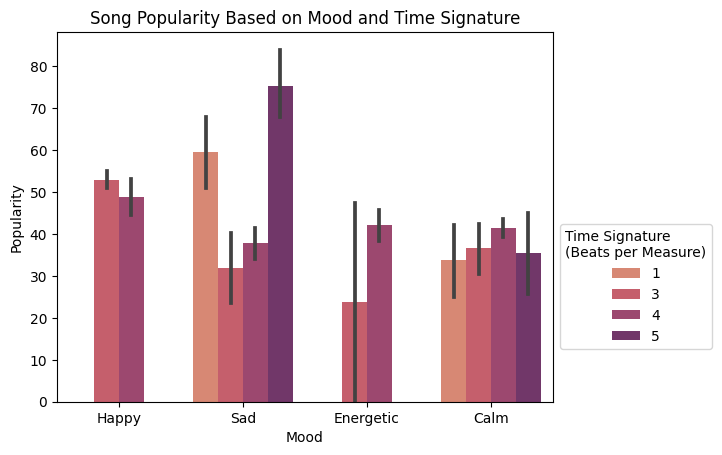

In [6]:
# visualization 1
# barchart for comparison between moods and popularity with time signature hue
ax = sns.barplot(data = music_data, x = 'mood', y = 'popularity', hue = 'time_signature', palette = 'flare')
ax.set(ylabel = 'Popularity', xlabel = 'Mood', title = 'Song Popularity Based on Mood and Time Signature')
plt.legend(title = 'Time Signature\n(Beats per Measure)', bbox_to_anchor = (1, 0.50), loc = 'upper left')

Description: The visualization above shows a barchart detailing the popularity of different moods. There is an added factor of showing the time signature of these songs as well. We can see that for calm or happy music, the time signature does not make too much of an impact on how popular those songs end up being.

We can see that for energetic music, there are no songs with the time signature of 1 or 5. This can lead us to conclude that a consistent and relatively faster time signature is key to music being categorized as "energetic". The same can be said for happy music. We can explore the data further and see if happy and energetic music falls under some sort of "formula" - we can see if other factors of the song such as tempo follow similar guidelines.

Sad and calm music have more variability in their time signature, and it is clear from the visualization that sad music has the most. Sad songs trend more towards the edges of the time signature domain, most songs either having a time signature of 1 or 5.

[Text(0, 0.5, 'Mood'),
 Text(0.5, 0, 'Tempo (Beats Per Min)'),
 Text(0.5, 1.0, 'Song Tempo Dictated By Different Moods')]

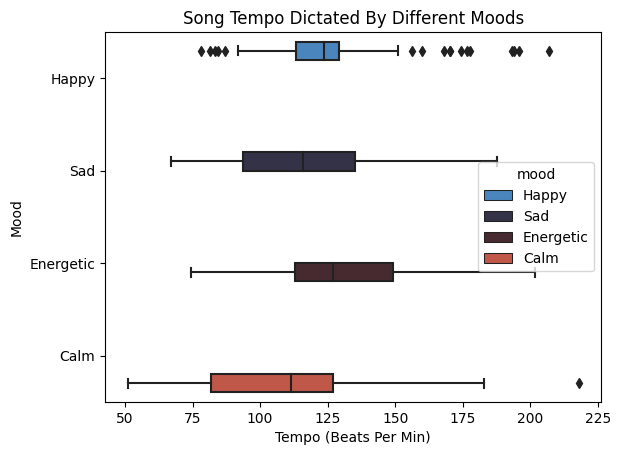

In [7]:
# visualization 2
# boxplot for comparison between tempo of the music and moods
ax = sns.boxplot(data = music_data, x = 'tempo', y = 'mood', hue = 'mood', palette = 'icefire')
ax.set(ylabel = 'Mood', xlabel = 'Tempo (Beats Per Min)', title = 'Song Tempo Dictated By Different Moods')

**Interesting Hypothesis Explanation**

The interesting hypothesis considered here is thinking about how tempo is affected based on the moods that the particular songs invoke. Various moods (happy, sad, energetic, or calm) have different levels or speeds the musical piece is played to portray the overall song's atmosphere.

**Why this is an interesting hypothesis to investigate?**

This was an interesting hypothesis to investigate to consider one of the important factors that contribute to why people feel a certain way towards particular songs. The tempo of the song can alter how the song makes an individual feel and can be interesting to observe this dynamic visually. For that, it was fascinating to consider this idea and investigate affects of tempo on moods pertaining to different songs

**Interesting Graph Insights**

The key things that appear evident at first glance is that there are outliers present for the happy and calm moods. This may mean that tempos have drastically differing values outside of the 5-number summary for songs invoking feelings of happiness and calmness. Other noticeable things is that happy and energetic songs have higher medians compared to the sad and calm songs. The range of tempos for sad, energetic, and calm songs are more than happy songs. This could be that happy songs fall within a subset of tempos to achieve happiness in the song. It also appears to be that songs that are sad or calm are more slower to create sorrowful or serene tones which are not played at quick speeds but lower tempos. This can be observed with the lower quartile of sad and calm songs being 50 to 100 beats per minute. In contrast, energetic and happy songs have a higher quartile range between 75 to 125 beats per minute.

### Machine Learning Analysis

In [22]:
# Machine Learning Analysis 1 (Shreya)
# Determine the mood of the song(happy/sad/energetic/calm) based on tempo

# Split test and train data
X = music_data['popularity']
y = music_data['mood']

X_train = X[:620]
X_test = X[620:]

y_train = y[:620]
y_test = y[620:]

# Baseline comparision
freq_dict = {}

for i in y:
  freq_dict.setdefault(i, 0)
  freq_dict[i] += 1

max_freq = max(freq_dict.values())
max_freq_lst = []

for k, v in freq_dict.items():
  if v == max_freq:
    max_freq_lst.append(k)

mode = max_freq_lst[0]

labels = [mode] * X.shape[0]

correct_pred_cnt = 0

for i in range(len(labels)):
  if labels[i] == y[i]:
    correct_pred_cnt += 1

training_accuracy = correct_pred_cnt/len(y)
print("Training accuracy for baseline is ", training_accuracy)

# Actual model

clf = svm.SVC(gamma = 'scale', kernel = 'rbf')
clf.fit(X_train.array.reshape(-1, 1), y_train.array)

y_pred = clf.predict(X_test.array.reshape(-1,1))
accuracy = metrics.accuracy_score(y_test.array, y_pred)
print("Training accuracy for svm is ", accuracy)

Training accuracy for baseline is  0.28717201166180756
Training accuracy for svm is  0.45454545454545453


**(Shreya)**
Obtained Result Interpretation

In [24]:
# Machine Learning Analysis 2 (Neelu)
# Provide Baseline comparison

X = music_data['tempo']
y = music_data['mood']

# split data for train and test data with 80%/20%
# length = len(X)
# indices = np.random_permutation(length)
# traini = indices[:int(math.ceil(length*0.8))]

xtrain = X[:620]
xtest = X[620:]

ytrain = y[:620]
ytest = y[620:]

# Convert both the X_train and X_test to 2D arrays
xtrain = xtrain.values.reshape(-1, 1)
xtest = xtest.values.reshape(-1, 1)

# Convert both y_train and y_test to lists
ytrain = ytrain.tolist()
ytest = ytest.tolist()

# Baseline comparison
from statistics import mode
mode = mode(y)
pred = [mode] * X.shape[0]
training_accuracy = (pred == y).mean()
print("Training accuracy for baseline is ", training_accuracy)

# Actual model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)
predict = knn.predict(xtest)
acc = knn.score(xtest, ytest)
print("Training accuracy for KNN with Neighbors = 5: ", acc)

Training accuracy for baseline is  0.28717201166180756
Training accuracy for KNN with Neighbors = 5:  0.4090909090909091


**(Neelu)**
Obtained Result Interpretation

### Reflection

**What is the hardest part of the project that you’ve encountered so far?**

The hardest part of the project was to try to find a useful dataset or data source that can help us find meaningful insights on what causes people to feel certain ways when listening to different musical genres while considering how this can affect their mental health/well-being. At first, we have created google surveys to collect data on a person's age group, how a set of musical genres makes them feel one of three ways (positive, neutral, or negative), and if those musical genre selection affect their mental health/well-being. This data was limited in scope as these factors are not enough to draw meaningful conclusions from so we decided to use another dataset pertaining to music. This data was more useful as there were other useful factors since as time, key, time signature, tempo, popularity, and moods which was what we wanted to address as a group. Other difficult aspects of the project was finding useful insights on the data to help make informed conclusions on addressing our initial poroblem. This meant observing and cleaning the data to better help us make meaningful visualizations and develop useful ML models. Finding those factors and fidning relationships that were relevant such as popularity, time signature, and tempo of a song to the moods was not simple.

**What are your initial insights?**

From the data, the initial insights are that various moods (happy, sad, energetic, and calm) are influenced based on some key features of songs. These include the song's tempo, key, time signature, and popularity. From the exploratory data analysis and visualizations, it can observed that songs that invoke feelings of happiness and are energetic are played at faster tempos and are only played with a 3 or 4 time signatures (beats per measure). In contrast, sad and calm songs are played at 1, 3, 4, 5 time signature with more time signature variability but played at slower tempos. However, though the EDA may show that average popularity was more for happier songs than sad songs the time signature says otherwise. The first visualization shows that sad songs with 5 beats per measure have large following as the popularity is much greater than all other mood and time signature combinations presented in this graph.

**(Darlene)**

**Are there any concrete results you can show at this point? If not, why not?**

**(Darlene)**

**Going forward, what are the current biggest problems you’re facing?**

**(Shreya)**

**Do you think you are on track with your project? If not, what parts do you need to dedicate more time to?**

**(Shreya)**

**Given your initial exploration of the data, is it worth proceeding with your project, why?**

**(Neelu)**

**If not, how are you going to change your project and why do you think it’s better than your current results?**

### Next Steps

**(Neelu)**

**What you plan to accomplish in the next month and how you plan to evaluate whether your project achieved the goals you set for it.**